In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
def get_systems_variables(pert_file):
    
    columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']
    Num_syst = pert_file['ident'].values[-1]+1
    syst_vars = pd.DataFrame(columns=columns)
    for i in range(Num_syst):
        Current_syst = pert_file[pert_file['ident'].values==i]
        planets=np.shape(Current_syst)[0]

        if(planets>0):
            initials=Current_syst[columns[:11]].values[0]
            planets=np.shape(Current_syst)[0]
            row_vals=np.append(initials,planets)

            planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
            row_vals=np.append(row_vals,planet_mass)

            eff=planet_mass/Current_syst['emed'].values[0]
            row_vals=np.append(row_vals,eff)
        else:
            row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
        syst_vars.loc[i]=row_vals
    return syst_vars

#High Perturbation System Analysis
highp_vars = get_systems_variables(highPerturbation)
highp_vars = highp_vars[highp_vars['num_planets'].values!=0]
#Low Perturbation System Analysis
lowp_vars = get_systems_variables(lowPerturbation)
lowp_vars = lowp_vars[lowp_vars['num_planets'].values!=0]

# Se entrena una SVM para cada una de las salidas
## Linear Kernel

In [125]:
salidas = ['num_planets','mass_planets','mass_efficiency']
relevant_inputs=['emestar','rc','qest','sigmag_0','emed','emetal','taugas']
all_inputs=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
Mode = 0 ## 1 for Highp 0 for Lowp
Scale = 1

if Mode==1:
    SVM_Vars= highp_vars
elif Mode==0:
    SVM_Vars= lowp_vars

#Dividing Input and Output Variables
X = SVM_Vars[relevant_inputs]

#Scaling Input values
if Scale==1:
    scaler = preprocessing.StandardScaler().fit(X)
    Xs = scaler.transform(X)
elif Scale==0:
    Xs=X


In [116]:
#Iterate on outputs

Css=np.linspace(0.001,5,num=5)
Res_lin = np.zeros([len(Css),3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (c,i) in zip(Css,range(len(Css))):
        clf = svm.SVC(kernel='linear', C=c)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res_lin[i,j]=np.mean(scores)

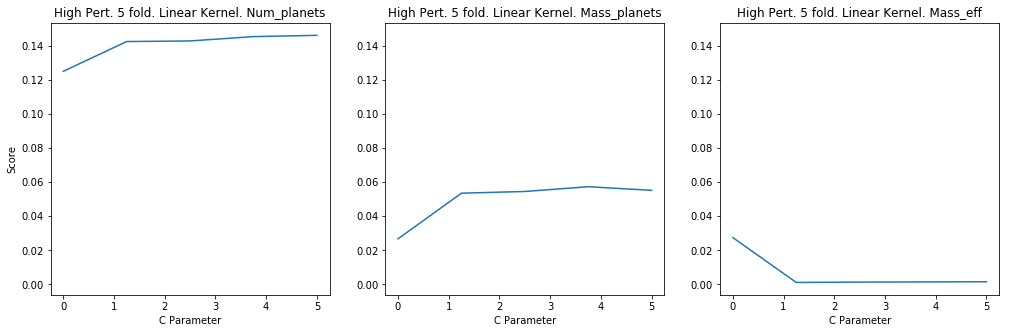

In [117]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.plot(Css,Res_lin[:,0])
plt.xlabel('C Parameter')
plt.ylabel('Score')
plt.title('High Pert. 5 fold. Linear Kernel. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.plot(Css,Res_lin[:,1])
plt.xlabel('C Parameter')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Linear Kernel. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.plot(Css,Res_lin[:,2])
plt.xlabel('C Parameter')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Linear Kernel. Mass_eff')

## Gaussian Kernel

In [67]:
#Iterate on outputs

Cs = 1 #np.linspace(0.001,5,num=20)
Gammas = np.linspace(0.001,5,num=20)
Res_gauss = np.zeros([len(Gammas),3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (g,i) in zip(Gammas,range(len(Gammas))):
        clf = svm.SVC(kernel='rbf', C=Cs, gamma=g)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res_gauss[i,j]=np.mean(scores)

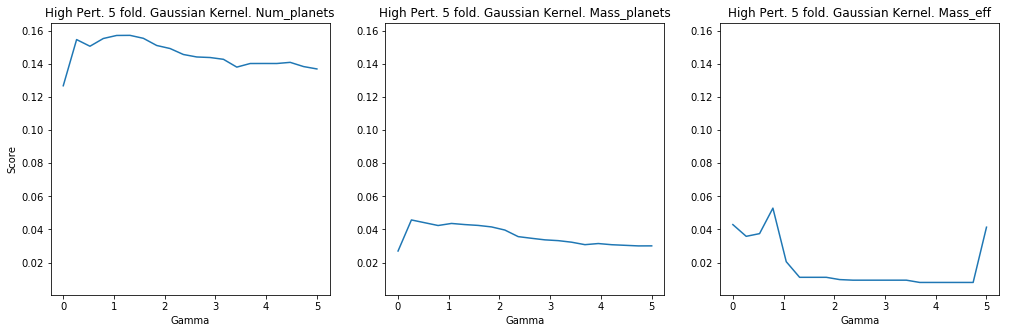

In [72]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.plot(Gammas,Res_gauss[:,0])
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('High Pert. 5 fold. Gaussian Kernel. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.plot(Gammas,Res_gauss[:,1])
plt.xlabel('Gamma')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Gaussian Kernel. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.plot(Gammas,Res_gauss[:,2])
plt.xlabel('Gamma')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Gaussian Kernel. Mass_eff')

## Polynomial Kernel

In [76]:
#Iterate on outputs

Cs = 1 #np.linspace(0.001,5,num=20)
Degs = np.linspace(1,10,15)
Res_poly = np.zeros([len(Degs),3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (d,i) in zip(Degs,range(len(Degs))):
        clf = svm.SVC(kernel='poly', C=Cs, degree=d)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res_poly[i,j]=np.mean(scores)

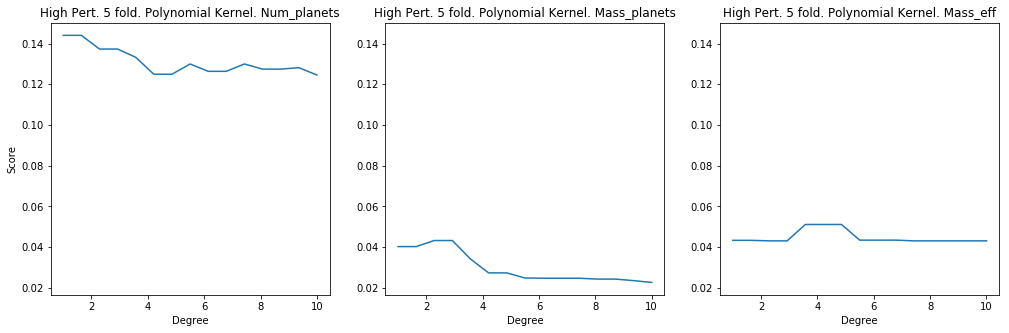

In [77]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.plot(Degs,Res_poly[:,0])
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('High Pert. 5 fold. Polynomial Kernel. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.plot(Degs,Res_poly[:,1])
plt.xlabel('Degree')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Polynomial Kernel. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.plot(Degs,Res_poly[:,2])
plt.xlabel('Degree')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Polynomial Kernel. Mass_eff')

# Regresion LASSO

In [118]:
start=-4.0
stop=3.0
quantity=40
alphas=np.logspace(start,stop,num=quantity)

Res_Lasso = np.zeros([quantity,3])

for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    
    for (a,i) in zip(alphas,range(quantity)):
        clf = linear_model.Lasso(alpha=a)
        scores = cross_val_score(clf, Xs, Y, cv=5)
        Res_Lasso[i,j]=np.mean(scores)

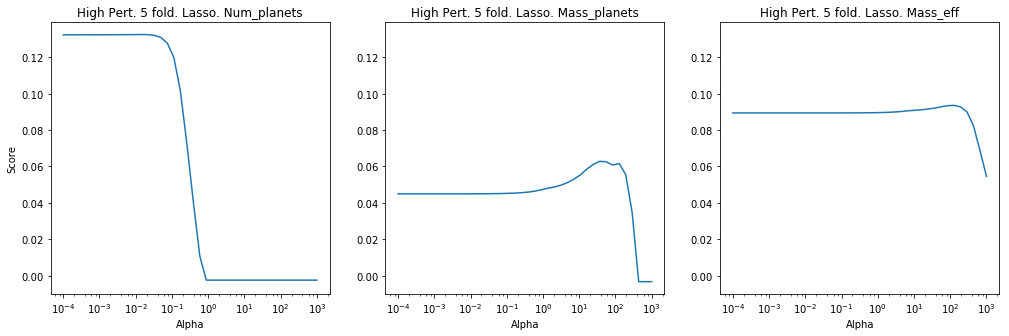

In [119]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.semilogx(alphas,Res_Lasso[:,0])
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('High Pert. 5 fold. Lasso. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.semilogx(alphas,Res_Lasso[:,1])
plt.xlabel('Alpha')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Lasso. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.semilogx(alphas,Res_Lasso[:,2])
plt.xlabel('Alpha')
#plt.ylabel('Score')
plt.title('High Pert. 5 fold. Lasso. Mass_eff')

# Neural Network SkLearn

In [136]:
start=-4.0
stop=1.0
quantity=5
alphas=np.logspace(start,stop,num=quantity)

Res_NN = np.zeros([quantity,3])


for j in range(len(salidas)):
    
    #Get Current Output
    Y = SVM_Vars[salidas[j]]
    if j>0:
        Y = np.around(Y.values,decimals=1)*10

    for (a,i) in zip(alphas,range(len(alphas))):
        clf = MLPClassifier(solver='lbfgs', alpha=a, hidden_layer_sizes=(10, 4), random_state=1)
        scores = cross_val_score(clf, Xs, Y, cv=2)
        Res_NN[i,j]=np.mean(scores)

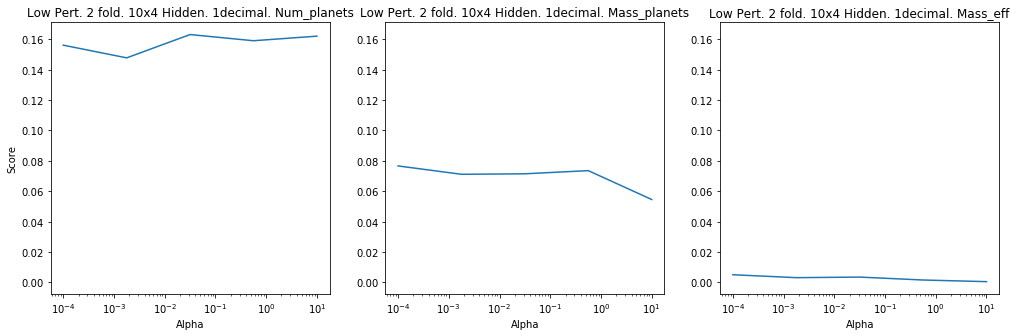

In [137]:
fig = plt.figure(figsize=(17, 5))

ax1=fig.add_subplot(131)
plt.semilogx(alphas,Res_NN[:,0])
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Low Pert. 2 fold. 10x4 Hidden. 1decimal. Num_planets')

ax2=fig.add_subplot(132,sharey=ax1)
plt.semilogx(alphas,Res_NN[:,1])
plt.xlabel('Alpha')
#plt.ylabel('Score')
plt.title('Low Pert. 2 fold. 10x4 Hidden. 1decimal. Mass_planets')

ax3=fig.add_subplot(133,sharey=ax1)
plt.semilogx(alphas,Res_NN[:,2])
plt.xlabel('Alpha')
#plt.ylabel('Score')
plt.title('Low Pert. 2 fold. 10x4 Hidden. 1decimal. Mass_eff')